# CellMigration MD simulation
## Yunsik Choe (CANONEQAL, SNU, rep. of Korea)

## force

In [3]:
from Cell_Lab import Cell_Lab
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import imageio
import os
from PIL import Image

model initialized


<IPython.core.display.Javascript object>


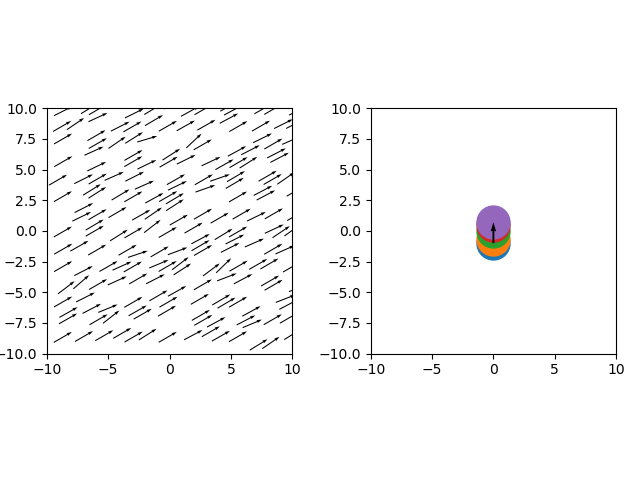

  0%|          | 5/2000 [00:07<48:11,  1.45s/it]


KeyboardInterrupt: 

In [4]:

C1 = Cell_Lab(L=20,N_ptcl=196,Fs=500)
C1.D = 40
C1.Dr = 0
C1.tau_noise =1

C1.n = 5
C1.l = [ -1,-0.7,    0,   0.5,0.7 ]
C1.r = [0.45,    0.45,     0.45,0.45,0.45]
C1.k = [300,    290,   280,270,260]


C1.poten_order = 3

C1.mu = 0.2*np.ones(C1.N_ptcl)
C1.mu[::4] = 0.01
C1.mur = 0.1*np.ones(C1.N_ptcl)
C1.mur[::4] = 0.001
C1.N_skip = 50
C1.p = 0
C1.memory = False
C1.tau_momentum = 0.1

name = '_inhom_1'
N_simul = 2000

C1.record = True           # True, False
C1.initialize = False      # True, False
C1.grid_ordered = True     # True, False
C1.ang_ordered = 'parallel'     # 'parallel', 'anti-parallel', False


C1.set_zero()
C1.animate(N_simul,name)


In [8]:
# name = '_order4'
# N_simul = 2000
path_dir = os.getcwd()+'/record/'+name+'/'
t_list = np.arange(N_simul)
# t_list = np.arange(500)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+'anim'+name+'.gif',paths,fps=30)

In [ ]:
C1 = Cell_Lab(L=15,N_ptcl=100,Fs=200)
C1.D = 10
C1.Dr = 0
C1.tau = 2
# C1.n = 13
# C1.l = [-1.5,  -1.2,   -1,   -0.7,  -0.5,    -0.3,  0,    0.3,     0.5 ,    0.7,    1,   1.3 ,  1.5]
# C1.r = [0.2,   0.3   ,0.35,  0.4,   0.45,     0.5, 0.2,   0.3,     0.35,    0.4,   0.45,  0.5,  0.6]
# C1.k = [30,    30,     30,    30,     30,      30,  30,    30,    30   ,   30,     30,    30,  30]


C1.n = 7
C1.l = [-1.5,   -1,  -0.5,    0,   0.5 ,   1,   1.5]
C1.r = [0.3,   0.3,  0.3, 0.3,   0.3,  0.3,  0.3]
C1.k = [150,    140,   130,    120,     150,      140,  130]
C1.mu = 0.1
C1.mur = 0.05
C1.N_skip = 50
C1.p = 0
C1.m = 0.01

name = '_parallel_2'
N_simul = 3000

C1.record = True           # True, False
C1.initialize = False      # True, False
C1.grid_ordered = True     # True, False
C1.ang_ordered = 'parallel'     # 'parallel', 'anti-parallel', False


C1.set_zero()
C1.animate(N_simul,name)


path_dir = os.getcwd()+'/record/'+name+'/'
# t_list = np.arange(N_simul)
t_list = np.arange(500)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+'anim'+name+'.gif',paths,fps=30)

In [ ]:
import imageio
import os
from PIL import Image
name = '_parallel_1'



path_dir = os.getcwd()+'/record/'+name+'/'
# t_list = np.arange(N_simul)
t_list = np.arange(500)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+'anim'+name+'.gif',paths,fps=30)

model initialized


<IPython.core.display.Javascript object>


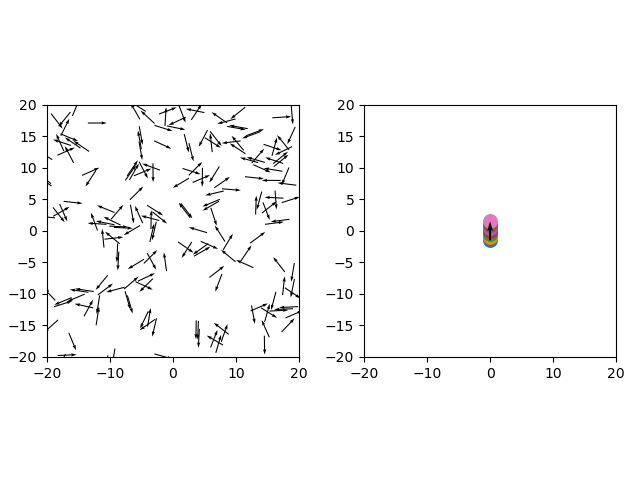

100%|██████████| 1000/1000 [42:41<00:00,  2.56s/it]


In [27]:
C1 = Cell_Lab(L=40,N_ptcl=200,Fs=200)
C1.D = 10
C1.Dr = 0
C1.tau = 2
# C1.n = 13
# C1.l = [-1.5,  -1.2,   -1,   -0.7,  -0.5,    -0.3,  0,    0.3,     0.5 ,    0.7,    1,   1.3 ,  1.5]
# C1.r = [0.2,   0.3   ,0.35,  0.4,   0.45,     0.5, 0.2,   0.3,     0.35,    0.4,   0.45,  0.5,  0.6]
# C1.k = [30,    30,     30,    30,     30,      30,  30,    30,    30   ,   30,     30,    30,  30]


C1.n = 7
C1.l = [-1.5,   -1,  -0.5,    0,   0.5 ,   1,   1.5]
C1.r = [0.3,   0.3,  0.3, 0.3,   0.3,  0.3,  0.3]
C1.k = [150,    140,   130,    120,     150,      140,  130]
C1.mu = 0.5
C1.mur = 0.2
C1.N_skip = 50
C1.p = 0
C1.m = 0.001

name = 'rod21'
N_simul = 1000

C1.record = True           # True, False
C1.initialize = False      # True, False
C1.grid_ordered = True     # True, False
C1.ang_ordered = 'parallel'     # 'parallel', 'anti-parallel', False


C1.set_zero()
C1.animate(N_simul,name)

import imageio
import os
from PIL import Image
path_dir = os.getcwd()+'/record/'+name+'/'
# t_list = np.arange(N_simul)
t_list = np.arange(500)
path=[path_dir+f"{t}.png" for t in t_list]
paths=[Image.open(i) for i in path]
imageio.mimsave(path_dir+'anim'+name+'.gif',paths,fps=30)

## active noise statistics verification

In [1]:
from Cell_Lab import Cell_Lab
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt

In [9]:
C1 = Cell_Lab(L=300,N_ptcl = 100000,Fs=1000)

model initialized


100%|██████████| 30000/30000 [02:34<00:00, 194.04it/s]


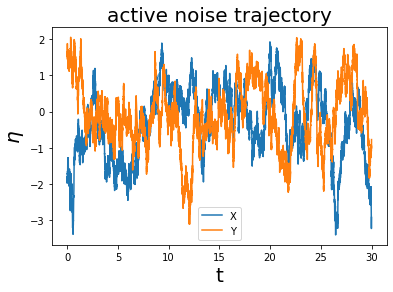

In [10]:
# active noise trajectory

simul_time = 30

duration = simul_time*C1.Fs
noiseX_history = np.empty([duration,C1.N_ptcl])
noiseY_history = np.empty([duration,C1.N_ptcl])

for i in trange(duration):
    noiseX_history[i] = C1.etaX
    noiseY_history[i] = C1.etaY
    C1.noise_evolve()
    
plt.title('active noise trajectory',fontsize=20)
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),noiseX_history[:,0],label='X')
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),noiseY_history[:,0],label='Y')
plt.xlabel('t',fontsize=20)
plt.ylabel(r'$\eta$',fontsize=20)
plt.legend()
plt.show()

In [55]:
measure_time = 5
t_axis = np.linspace(0,measure_time,measure_time*C1.Fs)+1/C1.Fs
autocorrX = np.empty(measure_time*C1.Fs)
autocorrY = np.empty(measure_time*C1.Fs)
for i in trange(measure_time*C1.Fs):
    autocorrX[i] = np.average(noiseX_history[i+1:]*noiseX_history[:-i-1])
    autocorrY[i] = np.average(noiseY_history[i+1:]*noiseY_history[:-i-1])


100%|██████████| 5000/5000 [11:08<00:00,  7.48it/s]


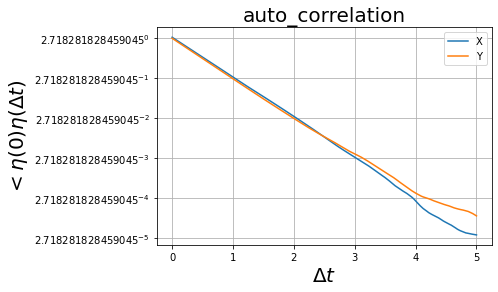

In [61]:
plt.title('auto_correlation',fontsize=20)
plt.plot(t_axis,autocorrX,label='X')
plt.plot(t_axis,autocorrY,label='Y')
plt.xlabel(r'$\Delta t$',fontsize=20)
plt.ylabel(r'$<\eta(0)\eta(\Delta t)$',fontsize=20)
plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()

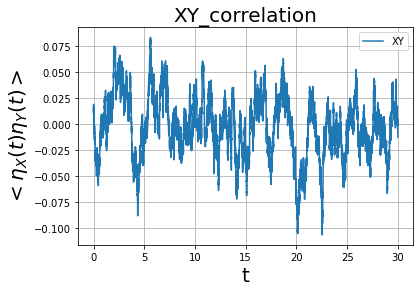

In [4]:
XYcorr = np.average(noiseX_history*noiseY_history,axis=1)

plt.title('XY_correlation',fontsize=20)
plt.plot(np.linspace(0,simul_time,simul_time*C1.Fs),XYcorr,label='XY')
plt.xlabel('t',fontsize=20)
plt.ylabel(r'$<\eta_X(t)\eta_Y(t)>$',fontsize=20)
# plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()

100%|██████████| 999/999 [00:00<00:00, 1923.02it/s]


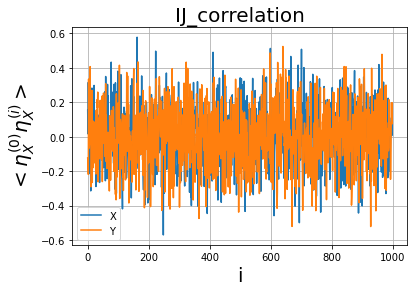

In [8]:
IJcorrX = np.empty(C1.N_ptcl-1)
IJcorrY = np.empty(C1.N_ptcl-1)

for i in trange(C1.N_ptcl-1):
    IJcorrX[i] = np.average(noiseX_history[:,0]*noiseX_history[:,i+1])
    IJcorrY[i] = np.average(noiseY_history[:,0]*noiseY_history[:,i+1])

    
plt.title('IJ_correlation',fontsize=20)
plt.plot(np.arange(C1.N_ptcl-1),IJcorrX,label='X')
plt.plot(np.arange(C1.N_ptcl-1),IJcorrY,label='Y')

plt.xlabel('i',fontsize=20)
plt.ylabel(r'$<\eta_X^{(0)}\eta_X^{(i)}>$',fontsize=20)
# plt.yscale('log',base=np.e)
plt.legend()
plt.grid()
plt.show()